In [1]:
#import the things we need
import numpy as np
import sympy as sp
import wpp3
import matplotlib.pyplot as plt
import timeit
import interpol3 as itp

In [3]:
#obtain the expressions from the datasets
#x1 and z1 correspond to a configuration containing 4 Weyl-points
#x2 and z2 correspond to a configuration containing 2 Weyl-points
x1_str = "Add(Mul(Integer(-1), Float('0.010464948861041989', precision=53), sin(Symbol('alpha_1', Real=True)), cos(Symbol('alpha_2', Real=True))), Mul(Float('0.022019731768174559', precision=53), sin(Symbol('alpha_1', Real=True)), cos(Add(Symbol('alpha_1', Real=True), Mul(Integer(-1), Symbol('alpha_2', Real=True))))), Mul(Integer(-1), Float('0.0068982626337711211', precision=53), sin(Symbol('alpha_1', Real=True)), cos(Add(Symbol('alpha_1', Real=True), Symbol('alpha_2', Real=True)))), Mul(Float('0.39679542224086295', precision=53), sin(Symbol('alpha_1', Real=True))), Mul(Float('0.010464948861041989', precision=53), sin(Symbol('alpha_2', Real=True)), cos(Symbol('alpha_1', Real=True))), Mul(Integer(-1), Float('0.022019731768174559', precision=53), sin(Symbol('alpha_2', Real=True)), cos(Add(Symbol('alpha_1', Real=True), Mul(Integer(-1), Symbol('alpha_2', Real=True))))), Mul(Float('0.0068982626337711211', precision=53), sin(Symbol('alpha_2', Real=True)), cos(Add(Symbol('alpha_1', Real=True), Symbol('alpha_2', Real=True)))), Mul(Integer(-1), Float('0.39679542224086295', precision=53), sin(Symbol('alpha_2', Real=True))), Mul(Integer(-1), Float('0.0098178816255572732', precision=53), sin(Add(Symbol('alpha_1', Real=True), Mul(Integer(-1), Symbol('alpha_2', Real=True)))), cos(Symbol('alpha_1', Real=True))), Mul(Integer(-1), Float('0.0098178816255572732', precision=53), sin(Add(Symbol('alpha_1', Real=True), Mul(Integer(-1), Symbol('alpha_2', Real=True)))), cos(Symbol('alpha_2', Real=True))), Mul(Float('0.016260917178114884', precision=53), sin(Add(Symbol('alpha_1', Real=True), Mul(Integer(-1), Symbol('alpha_2', Real=True)))), cos(Add(Symbol('alpha_1', Real=True), Symbol('alpha_2', Real=True)))), Mul(Integer(-1), Float('0.014025478137903891', precision=53), sin(Add(Symbol('alpha_1', Real=True), Mul(Integer(-1), Symbol('alpha_2', Real=True))))), Mul(Float('0.016431234471324233', precision=53), sin(Add(Symbol('alpha_1', Real=True), Symbol('alpha_2', Real=True))), cos(Symbol('alpha_1', Real=True))), Mul(Integer(-1), Float('0.016431234471324233', precision=53), sin(Add(Symbol('alpha_1', Real=True), Symbol('alpha_2', Real=True))), cos(Symbol('alpha_2', Real=True))), Mul(Float('0.73287120187265398', precision=53), cos(Symbol('alpha_1', Real=True))), Mul(Integer(-1), Float('0.73287120187265398', precision=53), cos(Symbol('alpha_2', Real=True))))"
z1_str = "Add(Mul(Float('0.0011498637666376432', precision=53), sin(Symbol('alpha_1', Real=True)), cos(Symbol('alpha_2', Real=True))), Mul(Float('0.079405702957495994', precision=53), sin(Symbol('alpha_1', Real=True)), cos(Add(Symbol('alpha_1', Real=True), Mul(Integer(-1), Symbol('alpha_2', Real=True))))), Mul(Integer(-1), Float('0.082198906354412349', precision=53), sin(Symbol('alpha_1', Real=True)), cos(Add(Symbol('alpha_1', Real=True), Symbol('alpha_2', Real=True)))), Mul(Integer(-1), Float('0.66275844851435595', precision=53), sin(Symbol('alpha_1', Real=True))), Mul(Float('0.0011498637666376432', precision=53), sin(Symbol('alpha_2', Real=True)), cos(Symbol('alpha_1', Real=True))), Mul(Float('0.079405702957495994', precision=53), sin(Symbol('alpha_2', Real=True)), cos(Add(Symbol('alpha_1', Real=True), Mul(Integer(-1), Symbol('alpha_2', Real=True))))), Mul(Integer(-1), Float('0.082198906354412349', precision=53), sin(Symbol('alpha_2', Real=True)), cos(Add(Symbol('alpha_1', Real=True), Symbol('alpha_2', Real=True)))), Mul(Integer(-1), Float('0.66275844851435595', precision=53), sin(Symbol('alpha_2', Real=True))), Mul(Integer(-1), Float('0.040883553010049055', precision=53), sin(Add(Symbol('alpha_1', Real=True), Mul(Integer(-1), Symbol('alpha_2', Real=True)))), cos(Symbol('alpha_1', Real=True))), Mul(Float('0.040883553010049055', precision=53), sin(Add(Symbol('alpha_1', Real=True), Mul(Integer(-1), Symbol('alpha_2', Real=True)))), cos(Symbol('alpha_2', Real=True))), Mul(Float('0.019933121881056302', precision=53), sin(Add(Symbol('alpha_1', Real=True), Symbol('alpha_2', Real=True))), cos(Symbol('alpha_1', Real=True))), Mul(Float('0.019933121881056302', precision=53), sin(Add(Symbol('alpha_1', Real=True), Symbol('alpha_2', Real=True))), cos(Symbol('alpha_2', Real=True))), Mul(Integer(-1), Float('0.029007221821316279', precision=53), sin(Add(Symbol('alpha_1', Real=True), Symbol('alpha_2', Real=True))), cos(Add(Symbol('alpha_1', Real=True), Mul(Integer(-1), Symbol('alpha_2', Real=True))))), Mul(Integer(-1), Float('0.25678121607453996', precision=53), sin(Add(Symbol('alpha_1', Real=True), Symbol('alpha_2', Real=True)))), Mul(Float('0.21851706177654018', precision=53), cos(Symbol('alpha_1', Real=True))), Mul(Float('0.21851706177654018', precision=53), cos(Symbol('alpha_2', Real=True))), Mul(Float('0.094508322563965796', precision=53), cos(Add(Symbol('alpha_1', Real=True), Mul(Integer(-1), Symbol('alpha_2', Real=True))))), Mul(Integer(-1), Float('0.92369782222998897', precision=53), cos(Add(Symbol('alpha_1', Real=True), Symbol('alpha_2', Real=True)))))"
x2_str = "Add(Mul(Integer(-1), Float('0.032470154215813202', precision=53), sin(Symbol('alpha_1', Real=True)), cos(Symbol('alpha_2', Real=True))), Mul(Integer(-1), Float('0.018341504469887707', precision=53), sin(Symbol('alpha_1', Real=True)), cos(Add(Symbol('alpha_1', Real=True), Mul(Integer(-1), Symbol('alpha_2', Real=True))))), Mul(Integer(-1), Float('0.02584657113157135', precision=53), sin(Symbol('alpha_1', Real=True)), cos(Add(Symbol('alpha_1', Real=True), Symbol('alpha_2', Real=True)))), Mul(Float('0.42340080441038686', precision=53), sin(Symbol('alpha_1', Real=True))), Mul(Float('0.032470154215813202', precision=53), sin(Symbol('alpha_2', Real=True)), cos(Symbol('alpha_1', Real=True))), Mul(Float('0.018341504469887707', precision=53), sin(Symbol('alpha_2', Real=True)), cos(Add(Symbol('alpha_1', Real=True), Mul(Integer(-1), Symbol('alpha_2', Real=True))))), Mul(Float('0.02584657113157135', precision=53), sin(Symbol('alpha_2', Real=True)), cos(Add(Symbol('alpha_1', Real=True), Symbol('alpha_2', Real=True)))), Mul(Integer(-1), Float('0.42340080441038686', precision=53), sin(Symbol('alpha_2', Real=True))), Mul(Integer(-1), Float('0.013407588057633993', precision=53), sin(Add(Symbol('alpha_1', Real=True), Mul(Integer(-1), Symbol('alpha_2', Real=True)))), cos(Symbol('alpha_1', Real=True))), Mul(Integer(-1), Float('0.013407588057633993', precision=53), sin(Add(Symbol('alpha_1', Real=True), Mul(Integer(-1), Symbol('alpha_2', Real=True)))), cos(Symbol('alpha_2', Real=True))), Mul(Integer(-1), Float('0.11717110142107615', precision=53), sin(Add(Symbol('alpha_1', Real=True), Mul(Integer(-1), Symbol('alpha_2', Real=True)))), cos(Add(Symbol('alpha_1', Real=True), Symbol('alpha_2', Real=True)))), Mul(Integer(-1), Float('0.53206876274952153', precision=53), sin(Add(Symbol('alpha_1', Real=True), Mul(Integer(-1), Symbol('alpha_2', Real=True))))), Mul(Float('0.04655987205602196', precision=53), sin(Add(Symbol('alpha_1', Real=True), Symbol('alpha_2', Real=True))), cos(Symbol('alpha_1', Real=True))), Mul(Integer(-1), Float('0.04655987205602196', precision=53), sin(Add(Symbol('alpha_1', Real=True), Symbol('alpha_2', Real=True))), cos(Symbol('alpha_2', Real=True))), Mul(Integer(-1), Float('0.33574817443967653', precision=53), cos(Symbol('alpha_1', Real=True))), Mul(Float('0.33574817443967653', precision=53), cos(Symbol('alpha_2', Real=True))))"
z2_str = "Add(Mul(Integer(-1), Float('0.026728543497878052', precision=53), sin(Symbol('alpha_1', Real=True)), cos(Symbol('alpha_2', Real=True))), Mul(Float('0.023113633519403196', precision=53), sin(Symbol('alpha_1', Real=True)), cos(Add(Symbol('alpha_1', Real=True), Mul(Integer(-1), Symbol('alpha_2', Real=True))))), Mul(Float('0.012742321189461336', precision=53), sin(Symbol('alpha_1', Real=True)), cos(Add(Symbol('alpha_1', Real=True), Symbol('alpha_2', Real=True)))), Mul(Integer(-1), Float('0.63409599361642344', precision=53), sin(Symbol('alpha_1', Real=True))), Mul(Integer(-1), Float('0.026728543497878052', precision=53), sin(Symbol('alpha_2', Real=True)), cos(Symbol('alpha_1', Real=True))), Mul(Float('0.023113633519403196', precision=53), sin(Symbol('alpha_2', Real=True)), cos(Add(Symbol('alpha_1', Real=True), Mul(Integer(-1), Symbol('alpha_2', Real=True))))), Mul(Float('0.012742321189461336', precision=53), sin(Symbol('alpha_2', Real=True)), cos(Add(Symbol('alpha_1', Real=True), Symbol('alpha_2', Real=True)))), Mul(Integer(-1), Float('0.63409599361642344', precision=53), sin(Symbol('alpha_2', Real=True))), Mul(Float('0.077104674672209633', precision=53), sin(Add(Symbol('alpha_1', Real=True), Mul(Integer(-1), Symbol('alpha_2', Real=True)))), cos(Symbol('alpha_1', Real=True))), Mul(Integer(-1), Float('0.077104674672209633', precision=53), sin(Add(Symbol('alpha_1', Real=True), Mul(Integer(-1), Symbol('alpha_2', Real=True)))), cos(Symbol('alpha_2', Real=True))), Mul(Float('0.020957405481623288', precision=53), sin(Add(Symbol('alpha_1', Real=True), Symbol('alpha_2', Real=True))), cos(Symbol('alpha_1', Real=True))), Mul(Float('0.020957405481623288', precision=53), sin(Add(Symbol('alpha_1', Real=True), Symbol('alpha_2', Real=True))), cos(Symbol('alpha_2', Real=True))), Mul(Float('0.015987937532170773', precision=53), sin(Add(Symbol('alpha_1', Real=True), Symbol('alpha_2', Real=True))), cos(Add(Symbol('alpha_1', Real=True), Mul(Integer(-1), Symbol('alpha_2', Real=True))))), Mul(Float('0.51969059184700517', precision=53), sin(Add(Symbol('alpha_1', Real=True), Symbol('alpha_2', Real=True)))), Mul(Integer(-1), Float('0.40318103994600729', precision=53), cos(Symbol('alpha_1', Real=True))), Mul(Integer(-1), Float('0.40318103994600729', precision=53), cos(Symbol('alpha_2', Real=True))), Mul(Float('0.76882471278759335', precision=53), cos(Add(Symbol('alpha_1', Real=True), Mul(Integer(-1), Symbol('alpha_2', Real=True))))), Mul(Float('0.54565635120175826', precision=53), cos(Add(Symbol('alpha_1', Real=True), Symbol('alpha_2', Real=True)))))"

In [4]:
#reobtain the expressions from the strings
x1 = sp.parsing.sympy_parser.parse_expr(x1_str)
z1 = sp.parsing.sympy_parser.parse_expr(z1_str)
x2 = sp.parsing.sympy_parser.parse_expr(x2_str)
z2 = sp.parsing.sympy_parser.parse_expr(z2_str)

In [5]:
#we need to get back the symbols from the expressions to use them again
symbol_list = list(z2.free_symbols)
print(symbol_list)

[alpha_1, alpha_2]


In [7]:
if str(symbol_list[0]) == "alpha_1":
    alpha1 = symbol_list[0]
    alpha2 = symbol_list[1]
else:
    alpha2 = symbol_list[0]
    alpha1 = symbol_list[1]
    
print(alpha1, alpha2)

alpha_1 alpha_2


In [23]:
#define a discrete interpolation
ts = np.linspace(0., 1., 20)

In [24]:
%%time
#do the interpolation, get the location and charges of the weyl points as a function of the interpolator t
locs_t, charges_t = itp.three_point_process(x1 = x1, z1 = z1, x2 = x2, z2 = z2, alpha1 = alpha1, alpha2 = alpha2, ts = ts)

CPU times: user 19.5 s, sys: 213 ms, total: 19.7 s
Wall time: 19.5 s


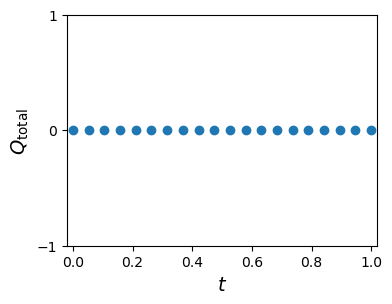

In [25]:
#Consistency check: calculate the total charge as a function of t
csum = [np.sum(charges_t[i]) for i in range(len(charges_t))]
fig = plt.figure(figsize =(4,3))
plt.scatter(ts, csum)
plt.xlabel(r"$t$", fontsize = 14)
plt.ylabel(r"$Q_{\mathrm{total}}$", fontsize = 14)
plt.yticks([-1,0,1])
plt.xlim(-0.02,1.02)
#plt.title(r"Total charge of the system during the interpolation" + "\n" + r"$D(t) = \left( 1 - t \right) \cdot D_1 +  t \cdot D_2$", fontsize = 10 )
#plt.savefig("intpol_totcharge_1.pdf", dpi = 500, bbox_inches='tight')
plt.show()

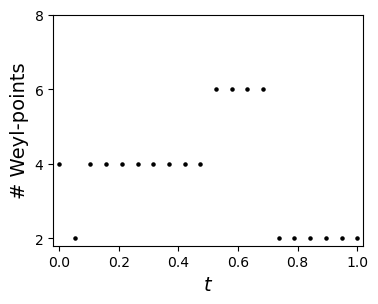

In [28]:
#Calculate the number of Weyl-points during the interpolation
wpnum = [len(locs_t[i]) for i in range(len(locs_t))]
fig = plt.figure(figsize =(4,3))
plt.scatter(ts, wpnum, s = 5, color ="black")
plt.xlabel(r"$t$", fontsize = 14)
plt.ylabel(r"# Weyl-points", fontsize = 14)
plt.yticks([2, 4, 6, 8])
plt.xlim(-0.02,1.02)
#plt.title(r"Total number of Weyl-points in the system during the interpolation" + "\n" + r"$D(t) = \left( 1 - t \right) \cdot D_1 +  t \cdot D_2$", fontsize = 10 )
plt.savefig("intpol_totnum_1.pdf", dpi = 500, bbox_inches='tight')
plt.show()

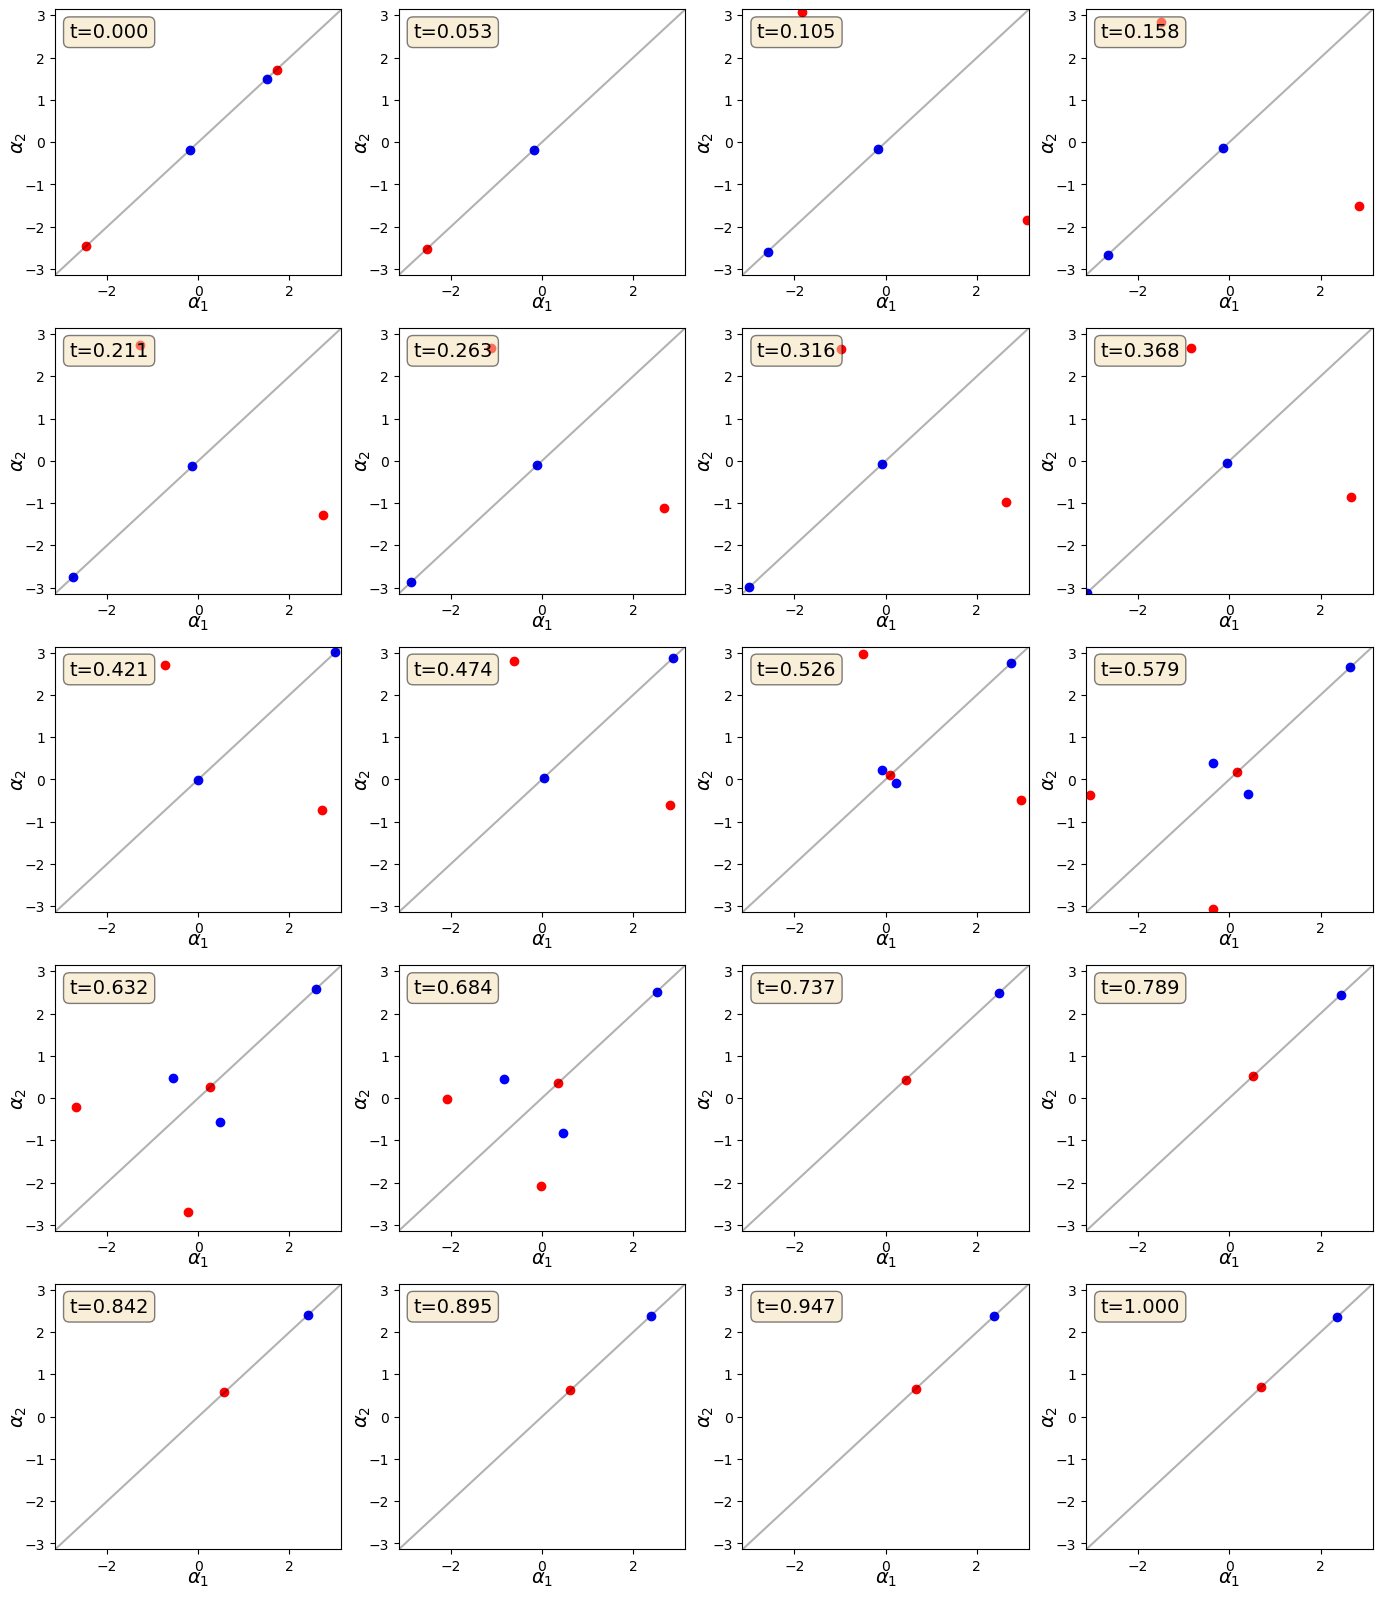

In [27]:
#Plot the location of the Weyl points as a cartoon
fig, axs = plt.subplots(int(len(ts)/4), 4, figsize = (17, 20 * (len(ts) / 20)))
for idx, ax in enumerate(axs.flat):
    #for each t point add a label to the plot 
    textstr = f"t={ts[idx]:.3f}"
    # these are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

    # place a text box in upper left in axes coords
    ax.text(0.05, 0.95, textstr, transform = ax.transAxes, fontsize = 14,
            verticalalignment = 'top', bbox = props)
    
    #add labels to the axis
    ax.set_xlabel(r"$\alpha_1$", fontsize = 14, labelpad = -3)
    ax.set_ylabel(r"$\alpha_2$", fontsize = 14, labelpad = -3)
    ax.set_ylim([-np.pi,np.pi])
    ax.set_xlim([-np.pi,np.pi])
    
    #for each location in locs_t plot the weyl points
    locs = locs_t[idx]
    cs = charges_t[idx]
    
    ax.plot([-np.pi, np.pi], [-np.pi, np.pi], c = "black", alpha = 0.3)
    
    for i in range(len(locs)):
        if cs[i] == 1:
            color = "red"
        elif cs[i] == -1 : 
            color = "blue"
        else:
            print("Warning, invalid charge!")
            
        ax.scatter(locs[i][0], locs[i][1], c = color)

plt.savefig("interpolation_cartoon.pdf", dpi = 500, bbox_inches='tight')